In [1]:
from data_handler import DataHandler
from linear_regression import LinearRegression
# from log_regression import LogisticalRegression
from calculations import Calculations

import numpy as np
import matplotlib.pyplot as plt

ITERATIONS = 2000
tr_log_loss = np.array(0)
val_log_loss = np.array(0)

TERMINATION_VALUE = 2**-16
LEARNING_RATE = 0.005

In [2]:
calculator = Calculations()
dh = DataHandler("spambase.data")
data = dh.parse_data_no_header()
data
data = dh.shuffle_data(data)
data_train, data_validation = dh.split_data(data)
data_train, data_validation

(array([[1.000e-01, 2.000e-01, 1.010e+00, ..., 6.690e+02, 1.351e+03,
         1.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 4.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+00, 1.500e+01,
         0.000e+00],
        ...,
        [8.900e-01, 0.000e+00, 0.000e+00, ..., 9.000e+00, 7.600e+01,
         0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.100e+01, 4.300e+01,
         0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.500e+01, 5.000e+01,
         0.000e+00]], dtype=float32),
 array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+01, 9.700e+01,
         0.000e+00],
        [0.000e+00, 0.000e+00, 1.100e+00, ..., 7.900e+01, 3.160e+02,
         0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 1.600e+01,
         0.000e+00],
        ...,
        [4.300e-01, 4.000e-01, 3.700e-01, ..., 1.780e+02, 3.303e+03,
         1.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.200e+01,

In [3]:
training_data_x, training_data_y_1 = dh.getXY(
            data_train, -56, 57)
training_data_y = training_data_y_1.reshape((training_data_x.shape[0], -1))
mean, std = dh.zscores(training_data_x)
training_data_x = dh.zscore_data(mean, std, training_data_x)

training_data_x.shape, training_data_y.shape

((3067, 56), (3067, 1))

In [4]:
validation_data_x, validation_data_y = dh.getXY(
            data_train, -56, 57)
validation_data_y = validation_data_y.reshape((validation_data_x.shape[0], -1))
validation_data_x = dh.zscore_data(mean, std, validation_data_x)
validation_data_x.shape, validation_data_y.shape

((3067, 56), (3067, 1))

In [87]:
# REDO
def compute_weights(X, b, Y, Y_):
    # dw = np.matmul(X, np.transpose(A - Y)) * (1.0/m)
    # dw = (1/m)*np.dot(X.T, (y_hat - y))
    m = X.shape[0]
    diff = Y_ - Y
    # return (1/m)*(np.dot(X.T, diff))
    return np.matmul(X.T, diff) * (1.0/m)

def train_model(w,b,X,Y):
    m, n = X.shape
    w = w.reshape(m, 1)
    print("Pre Train Weight Shape {}".format(w.shape))
    # w = w.reshape(X.shape[0], -1)
    # P = prediction_2(sigmoid(wx_b(w,X,b), b), b)
    P = prediction(w, X, b)
    dw = compute_weights(X, b, Y, P)
    db = compute_bias(P, Y)
    print("Post Train Weight Shape {}".format(w.shape))
    return dw, db, P

# Also interpreted as Y_hat
def sigmoid(fxn, b):
    return (1/(1+(np.exp(-fxn))))

def wx_b(w, X, b):
    return np.matmul(w.T,X)+b

def compute_bias(Y_hat, Y):
    return np.mean(Y_hat - Y)

def compute_log_loss(Y, P):
    p1 = np.multiply(Y, np.log(P, where=(P>0)))
    p2 = 1 - Y
    p3 = np.log(1.0-P, where=(1-P > 0))
    cost = (-1.0) * np.mean(p1 + np.multiply(1.0-Y, p3), axis=1)
    return np.squeeze(cost)

def prediction_2(wx_b_in, b):
    # print(w)
    # w = w.reshape(x.shape[0], -1)
    P_ = sigmoid(wx_b_in, b)
    m = P_.shape[1]
    # Y_prediction = np.zeros((1,m))
    Y_preds = np.zeros((1, m))
    # print(m)
    for k in range(m-1):
        if P[0, k] > 0.5:
            Y_preds[0, k] = 1
        else:
            Y_preds[0, k] = 0
    return Y_preds

def prediction(w, x, b):
    # print(w)
    w = w.reshape(x.shape[0], -1)
    P_ = sigmoid(wx_b(w, x, b), b)
    m = P_.shape[1]
    Y_prediction = np.zeros((1,m))
    Y_preds = np.zeros((1, m), dtype='f')
    # print(m)
    for k in range(m-1):
        if P[0, k] > 0.5:
            Y_preds[0, k] = 1
        else:
            Y_preds[0, k] = 0
    return Y_preds

In [85]:
# %%time

assert(training_data_x.shape[0] == training_data_y.shape[0])
m, n = training_data_x.shape
tr_costs = []
val_costs = []
w = np.zeros((m,1))
b = 0
# Reshaping y.
tX = training_data_x
tY = training_data_y
vX = validation_data_x
vY = validation_data_y

#Log Regression Calculation
for i in range(ITERATIONS):
    # Returns in order:
    ## Gradient Descent Weight
    ## Gradient Descent Bias
    ## Gradient Descent Probabilities/Y_hat
    dw, db, P = train_model(w, b, tX, tY)

    # Updating the parameters.
    print(w.shape)
    print(dw.shape)
    
    w -= (w-LEARNING_RATE)*dw
    b -= (b-LEARNING_RATE)*db
    
    tr_cost = compute_log_loss(tY, P)
    val_cost = compute_log_loss(vY, P)
    
    tr_costs.append(tr_cost)
    val_costs.append(val_cost)

    # print("Weight after iteration %i: " % (i), np.array(w))
    # print("Bias after iteration %i: %f" % (i, b))

    # Print costs when changed
    if i % 100 == 0:
        print("Training Mean Cost after iteration %i: %f" % (i, np.mean(tr_costs)))
        print("Validation Mean Cost after iteration %i: %f" % (i, np.mean(val_costs)))
        print("Weight after iteration %i: " % (i), np.array(w))
        print("Bias after iteration %i: %f" % (i, b))

    if np.mean(val_costs) < TERMINATION_VALUE:
        print("Termination Condition Hit, Exiting {}".format(np.mean(tr_costs)))
        break;

Pre Train Weight Shape (3067, 1)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3067 is different from 56)

[[ 0.03233591  0.00530981  0.00530981 ...  0.00530981  0.00530981
   0.00530981]
 [-0.03650298  0.02556974  0.02556974 ...  0.02556974  0.02556974
   0.02556974]
 [-0.03362773  0.02369344  0.02369344 ...  0.02369344  0.02369344
   0.02369344]
 ...
 [-0.03295628  0.02375111  0.02375111 ...  0.02375111  0.02375111
   0.02375111]
 [-0.03331827  0.0238517   0.0238517  ...  0.0238517   0.0238517
   0.0238517 ]
 [-0.03353763  0.02416743  0.02416743 ...  0.02416743  0.02416743
   0.02416743]] -0.007507403135105862
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 0.]]
Training Accuracy 22.779589175089665 %
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 0.]]
Validation Accuracy 22.779589175089665 %


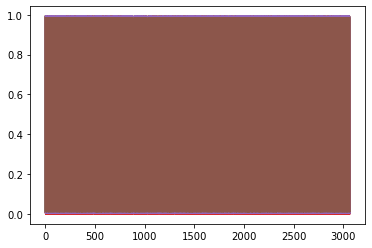

In [12]:
print(w, b)
plt.plot(P)
train_Y_preds = prediction(w, tX, b)
print(train_Y_preds)
train_acc = calculator.accuracy(tY, train_Y_preds)
print("Training Accuracy {} %".format(train_acc))

val_Y_preds = prediction(w, vX, b)
print(val_Y_preds)
val_acc = calculator.accuracy(vY, val_Y_preds)
print("Validation Accuracy {} %".format(val_acc))

In [ ]:
tr_costs = np.squeeze(tr_costs)
val_costs = np.squeeze(val_costs)

In [ ]:
plt.plot(tr_costs)
plt.title("Log Regression Costs")

plt.ylabel("cost")
plt.xlabel("iterations")

In [ ]:
plt.plot(val_costs)
plt.title("Log Regression Costs")

plt.ylabel("cost")
plt.xlabel("iterations")